In [42]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [43]:
# will construct a section of the qft between n and the other qubits
def qft_rotations(circuit, n):
    # n = number of qubits
    if(n==0):
        return(circuit)
    
    n -= 1
    circuit.h(n)
    
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit), qubit, n)
    
def qft(circuit, n):
    for qubit in range(n):
        qft_rotations(qc, n - qubit)


    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    

In [44]:
# 3 qubits
n = 4

qc = QuantumCircuit(n)

qft(qc, n)

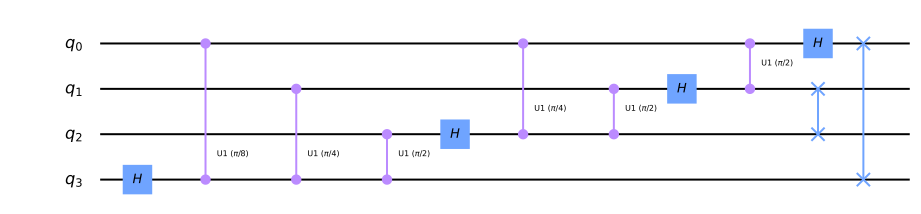

In [45]:
qc.draw('mpl')

In [46]:
def inverse_qft(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circuit.cu1(-pi/float(2**(j-m)), m, j)
        circuit.h(j)

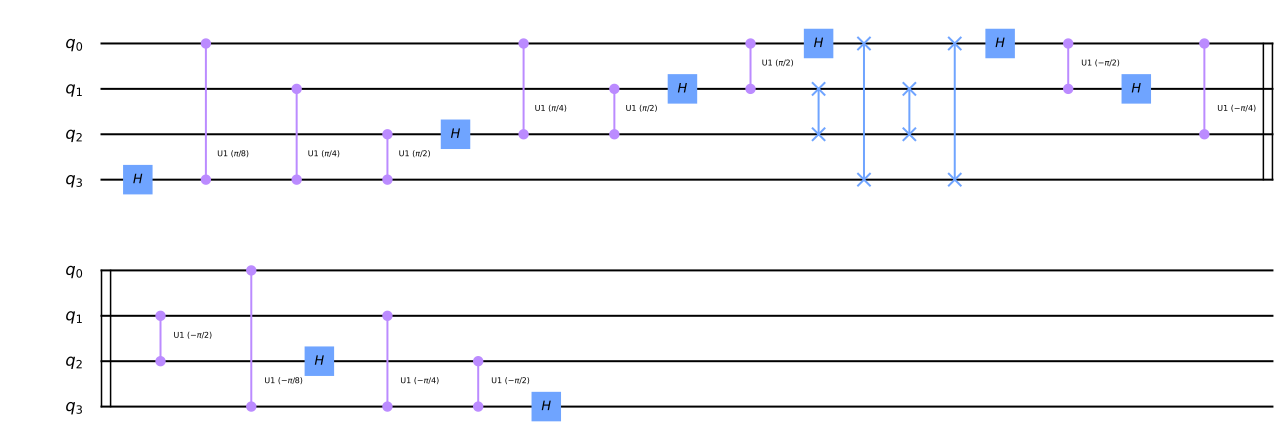

In [47]:
inverse_qft(qc, n)
qc.draw('mpl')